In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-simulation Details

Calculate the change in energy, $\Delta E$, when you flip one spin.

According to the the Ising Model, the energy of a given site on the square lattice is the sum of the 4 nearest neighbours.

The energy configuration at site $i,j$ is 
$$ E_{i,j} =  -S_{i,j}S_{i+1,j} -S_{i,j}S_{i-1,j} -S_{i,j}S_{i,j+1} -S_{i,j}S_{i,j-1}$$

Flipping a particular site changes the energy configuration to
$$E_{i,j} =  S_{i,j}S_{i+1,j} + S_{i,j}S_{i-1,j} + S_{i,j}S_{i,j+1} + S_{i,j}S_{i,j-1}$$

Thus the change in energy, $\Delta E = E(-s) - E(+s)$ is 

$$\Delta E_{i,j} = 2(S_{i,j}S_{i+1,j} + S_{i,j}S_{i-1,j} + S_{i,j}S_{i,j+1} + S_{i,j}S_{i,j-1})$$

# Metropolis Algorithm

1. Start with some initial state configuration, 𝑥 that has energy 𝐸(𝑥).
2. Make a move that changes the configuration to 𝑥’ that has energy 𝐸(𝑥’)
3. The probability that the move is accepted obeys
𝑃 = 1, Δ𝐸 = 𝐸(𝑥′
) − 𝐸(𝑥) ≤ 0
𝑃 = 𝑒−𝛽Δ𝐸, Δ𝐸 = 𝐸(𝑥′
) − 𝐸(𝑥) > 0
4. If the move is rejected, set the state back to 𝑥. Otherwise the new state is 𝑥’.
5. Go back to 2 and keep iterating until equilibrium is achieved and you sample enough states for
computing the desired averages.

## Step 1: Initialization

In [27]:
latticeLength = 20
lattice = np.random.choice([-1,1], size=[latticeLength, latticeLength])

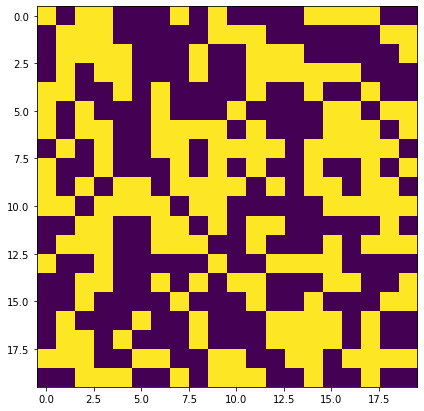

In [28]:
plt.figure(figsize=(7,7))
plt.imshow(lattice)

### Observables of Lattice Configuration

In [29]:
def leftNeighbour(i,j):
    return i, j-1

In [30]:
def rightNeighbour(i,j):
    return i, (j + 1) % latticeLength

In [31]:
def topNeighbour(i,j):
    return i -1, j

In [32]:
def bottomNeighbour(i,j):
    return (i + 1) % latticeLength, j

In the Ising Model, only the nearest neighbour spins interact, therefore the total energy of the spin lattice is:

$$E\,=\, -\frac{J}{2}\sum_{i}\sum_{j \epsilon n.n.}S_iS_j$$

In [33]:
def totalEnergy(lattice):
    
    latticeLength = np.shape(lattice)[0]
    
    latticeEnergy = 0.0
    
    for i in np.arange(latticeLength):
        for j in np.arange(latticeLength):
                   
            
            energy = -1.0 * (lattice[leftNeighbour(i,j)] + lattice[rightNeighbour(i,j)] 
                             + lattice[topNeighbour(i,j)] + lattice[bottomNeighbour(i,j)])
            
            latticeEnergy += energy
            
    print(latticeEnergy)
        

Net magnetization:

$$ M(\alpha) = \sum_{i} S_i$$

where $\alpha$ denotes the state of a micro-ensemble.

In [34]:
def netMagnetization(lattice):
    
    return lattice.sum()

The 2D Ising model has a 2nd order phase transition for $J$ > 0 where the critical temperature is:

$$T_c \approx 2.27 \frac{J}{k_B}$$

## Step 2: Metropolis Sweeps

In [35]:
#Define Constants
SPIN_UP = 1.0 #positive polarization at a site
SPIN_DOWN = -1.0 #negative polarization at a site

In [59]:
#Define parameters for this run
latticeSize = 100 #side length of the lattice
latticeLength = 100
temp = 2.5 #J/kb, temperature at which to simulate
numEquil = 600 #number of equilibration sweeps to do before starting to sample
sampleInterval = 70 #period with which to sample to reduce correlation b/w samples

#Set up Metropolis-Hastings algorithm
numSweeps = numEquil + sampleInterval*300 #number of sweeps in simulation, samples every 50
numSites = latticeSize**2 #number of sites in the lattice
latticeElems = np.random.choice([SPIN_DOWN, SPIN_UP], size = (latticeSize, latticeSize)) #LATTICE_SIZE x LATTICE_SIZE lattice, each element is either -1 or 1 (randomly)
#imshow(latticeElems)

magList = [] #records magnetizations, M = |sum_ij sij|, for each sweep
magSqrList = [] #records the square of the magnetizations, M^2 = (sum_ij sij)^2

for sweep in range(numSweeps):
    for i in range(numSites): #sweep over all sites
        
        #pick a random site
        randRow = int(np.random.random() * latticeSize) #select random row
        randCol = int(np.random.random() * latticeSize) #select random column
        
        #calculate change in energy
        deltaE = 2.0 * latticeElems[randRow, randCol] * (latticeElems[leftNeighbour(randRow, randCol)] + latticeElems[rightNeighbour(randRow, randCol)] + latticeElems[topNeighbour(randRow, randCol)] + latticeElems[bottomNeighbour(randRow, randCol)])
        
        if deltaE <= 0.0: #energetically favourable, decrease in energy
            latticeElems[randRow, randCol] *= -1.0 #flip the element
        else:
            randNum = np.random.random()
            if randNum <= np.exp(-deltaE/temp): #still has a chance to flip even if energetically unfavourable
                latticeElems[randRow, randCol] *= -1.0 #flip the element
                
    #output periodic samples and compute statistics
    if sweep > numEquil: #wait until after equilibration
        if sweep % sampleInterval == 0: #only take multiples of 
            
            #calculate statistics
            mag = sum(latticeElems) #compute magnetization for sweep
            magList.append(abs(mag)) #record magnetization
            magSqrList.append(mag**2) #compute and record magnetization squared for sweep

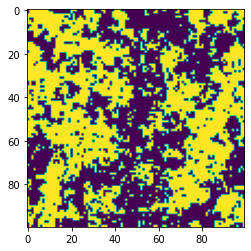

In [60]:
plt.imshow(latticeElems)